## Question 4

In [1]:
import sys
sys.path.append('/Users/mengyuan/my_env/lib/python3.8/site-packages')

In [2]:
import gym
import numpy as np

import matplotlib.pyplot as plt

In [3]:
def select_action_with_epsilon_greedy(curr_s, q_table, epsilon=0.1):
    action = np.argmax(q_table[curr_s, :])
    if np.random.rand() < epsilon:
        action = np.random.randint(q_table.shape[1])
    return action

In [8]:
env = gym.make("FrozenLake-v0")

state_n = env.observation_space.n
action_n = env.action_space.n

# Meta parameters for the RL agent
alpha = 0.1
gamma = 0.95
epsilon = 0.5
epsilon_decay = 0.999

# Experimental setup
n_episode = 5000
max_step = 100

# Initialize Q-table
q_table = np.zeros([state_n, action_n])

# Initialize a list for storing simulation history
history = []

In [9]:
for episode in range(n_episode):
    # reset accumulated reward for this episode
    episode_reward = 0
    # Start a new episode and sample the initial state
    state = env.reset()
    # Select the first action in this episode
    action = select_action_with_epsilon_greedy(state, q_table, epsilon=epsilon)
    
    for step in range(max_step):
        # get result of action from the environment
        next_state, reward, done, info = env.step(action)
        # update accumulate reward
        episode_reward = reward + gamma * episode_reward
        # select an action
        next_action = select_action_with_epsilon_greedy(next_state, q_table, epsilon=epsilon)
        # calculate TD error
        delta = reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action]
        # update q_table
        q_table[state, action] += alpha * delta
        
        state = next_state
        action = next_action
        
        if done:
            history.append([episode, step, episode_reward, reward, epsilon])
            break
    
    # Decay epsilon expolentially
    epsilon = epsilon * epsilon_decay

    
history = np.array(history)        

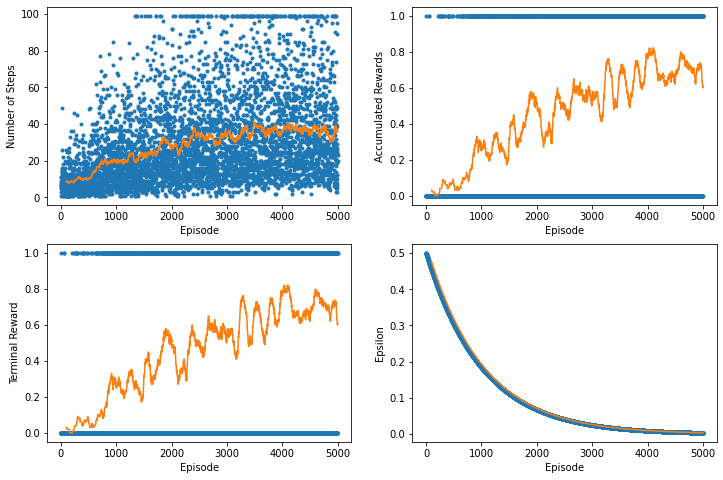

In [13]:
window_size = 100

def running_average(x, window_size, mode='valid'):
    return np.convolve(x, np.ones(window_size)/window_size, mode=mode)

fig, ax = plt.subplots(2, 2, figsize=[12, 8])
# Number of Steps
ax[0, 0].plot(history[:, 0], history[:, 1], '.')
ax[0, 0].set_xlabel('Episode')
ax[0, 0].set_ylabel('Number of Steps')
ax[0, 0].plot(history[window_size-1:, 0], running_average(history[:, 1], window_size))
# Accumulated Rewards
ax[0, 1].plot(history[:, 0], history[:, 2], '.')
ax[0, 1].set_xlabel('Episode')
ax[0, 1].set_ylabel('Accumulated Rewards')
ax[0, 1].plot(history[window_size-1:, 0], running_average(history[:, 2], window_size))
# Terminal Reward
ax[1, 0].plot(history[:, 0], history[:, 3], '.')
ax[1, 0].set_xlabel('Episode')
ax[1, 0].set_ylabel('Terminal Reward')
ax[1, 0].plot(history[window_size-1:, 0], running_average(history[:, 3], window_size))
# Epsilon
ax[1, 1].plot(history[:, 0], history[:, 4], '.')
ax[1, 1].set_xlabel('Episode')
ax[1, 1].set_ylabel('Epsilon')
ax[1, 1].plot(history[window_size-1:, 0], running_average(history[:, 4], window_size))
